Dataset Name: Credit Card Fraud Detection
https://www.kaggle.com/datasets/mlg-ulb/creditcarccraud

Business Scenario

A financial institution processes thousands of card transactions every minute.
Fraudulent transactions cause financial loss and customer dissatisfaction.

A single rule-based system is not reliable enough because:

. Fraud patterns change frequently
. Individual decision rules may be noisy

The company wants a robust decision system that:

. Reduces false alarms
· Detects fraud consistently
. Is less sensitive to noisy data

You are hired as a Data Analyst to build such a system.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score

In [3]:
data=pd.read_csv("D:\\3YR\\TEKWORKS\\Jan-7,8\\creditcard.csv")
cc=pd.DataFrame(data)

In [4]:
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
cc.isnull().sum().sum()

np.int64(0)

1. Load the dataset and understand the transaction-related attributes.
2. Identify relevant features that may help distinguish:
Fraudulent transactions
Legitimate transactions
3. Build a classification model that can decide whether a transaction is fraud or
not fraud.
4. Train the model using historical transaction data.
5. Predict outcomes for unseen transactions.
6. Evaluate the model using appropriate classification metrics.
7. Analyze the following:
How many fraudulent transactions were correctly detected?
How many legitimate transactions were incorrectly flagged as fraud?
8. Compare model behavior with a single rule-based classifier:
o Which model is more stable?
o Which model is less sensitive to noise?
9. Interpret results in business terms:
Is it better to block a genuine transaction or allow a fraudulent one?
Which tvpe of error is more costly?

In [8]:
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [23]:
y = cc['Class']
X = cc.drop('Class', axis=1)

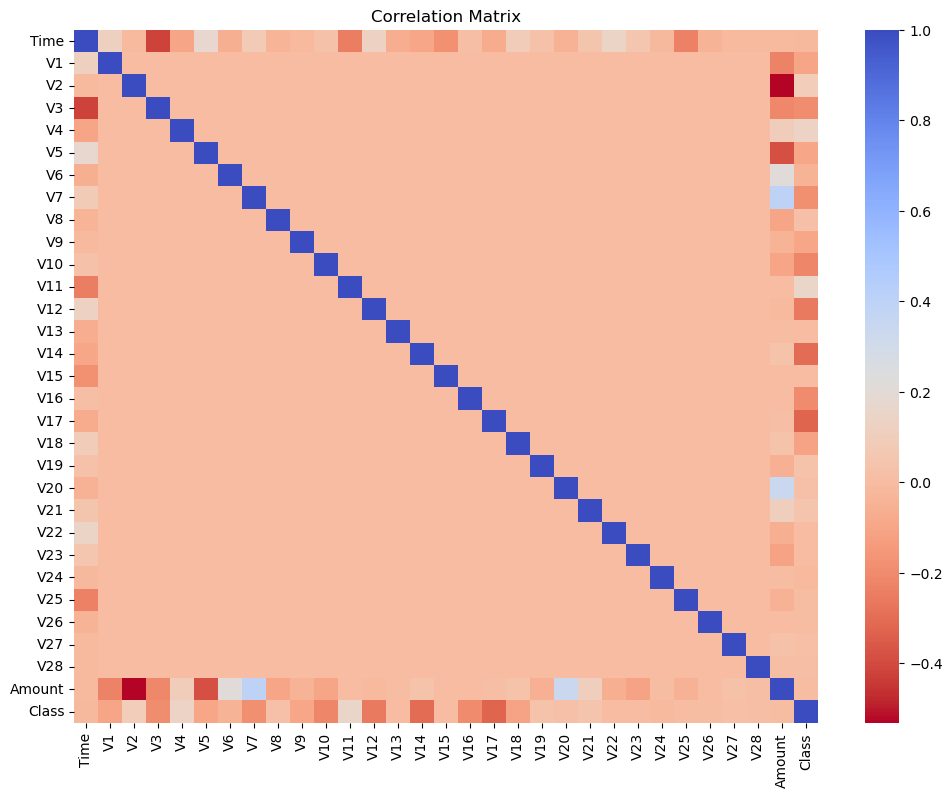

In [13]:
correlation_matrix = cc.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot_kws={'size':20})
plt.title("Correlation Matrix")
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [50]:
from sklearn.tree import DecisionTreeClassifier
dtc =DecisionTreeClassifier(
    criterion="gini",
    max_depth=4
)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [51]:
y_pred=dtc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.83      0.74      0.78       105

    accuracy                           1.00     56962
   macro avg       0.91      0.87      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9992451107756047


In [33]:
cm_dtc = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm_dtc)

Confusion Matrix
[[56851    13]
 [   19    79]]


In [38]:
TN, FP, FN, TP = cm_dtc.ravel()

print(f"\nAnalysis of Model Errors and Successes:")
print(f"- Fraudulent transactions correctly detected (True Positives): {TP}")
print(f"- Legitimate transactions incorrectly flagged as fraud (False Positives): {FP}")
print(f"- Fraudulent transactions missed (False Negatives): {FN}")
print(f"- Legitimate transactions correctly identified (True Negatives): {TN}")

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
print(f"\nRecall (Fraud Detection Rate): {recall:.4f}")
print(f"Precision (Accuracy of 'Fraud' flags): {precision:.4f}")



Analysis of Model Errors and Successes:
- Fraudulent transactions correctly detected (True Positives): 79
- Legitimate transactions incorrectly flagged as fraud (False Positives): 13
- Fraudulent transactions missed (False Negatives): 19
- Legitimate transactions correctly identified (True Negatives): 56851

Recall (Fraud Detection Rate): 0.8061
Precision (Accuracy of 'Fraud' flags): 0.8587


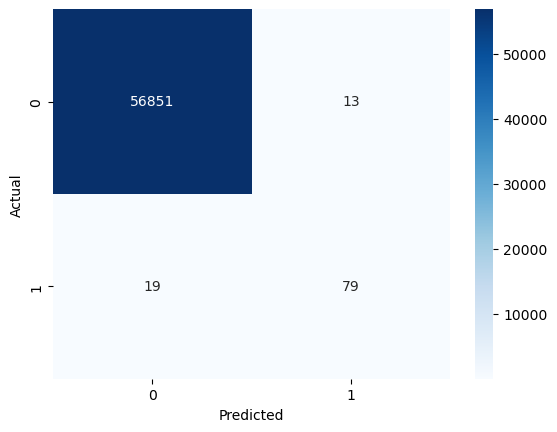

In [35]:
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

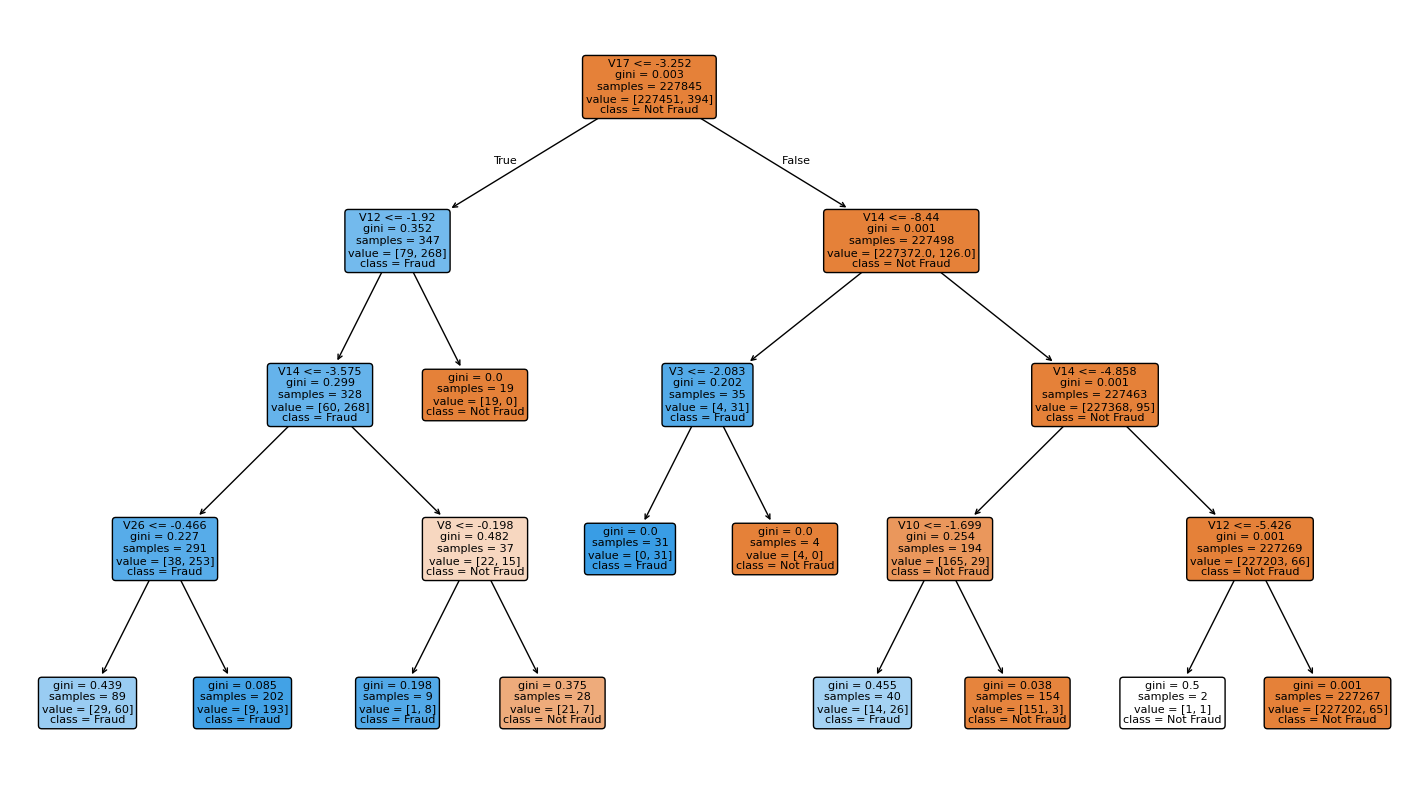

In [37]:
from sklearn. tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    dtc,
    feature_names=X.columns,
    class_names=["Not Fraud", "Fraud"],
    filled=True,
    rounded=True
)
plt.show()

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10 , criterion='entropy' )
rfc.fit(X_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [44]:
y_rfc =rfc.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc_rfc = accuracy_score(y_test, y_rfc)
cm_rfc= confusion_matrix(y_test, y_rfc)
print("Accuracy:", acc_rfc)
print("Confusion Matrix:\n ",cm_rfc)

Accuracy: 0.9995611109160493
Confusion Matrix:
  [[56864     0]
 [   25    73]]


<Axes: >

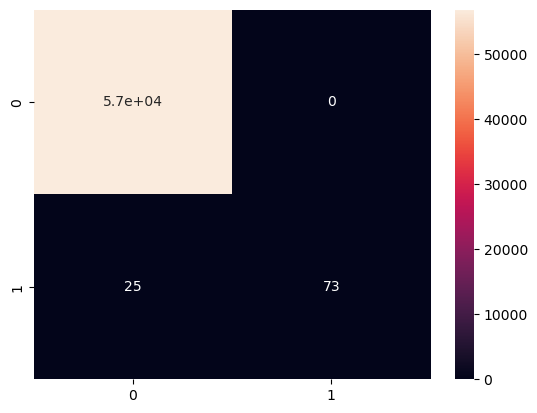

In [46]:
sns.heatmap(cm_rfc,annot=True)

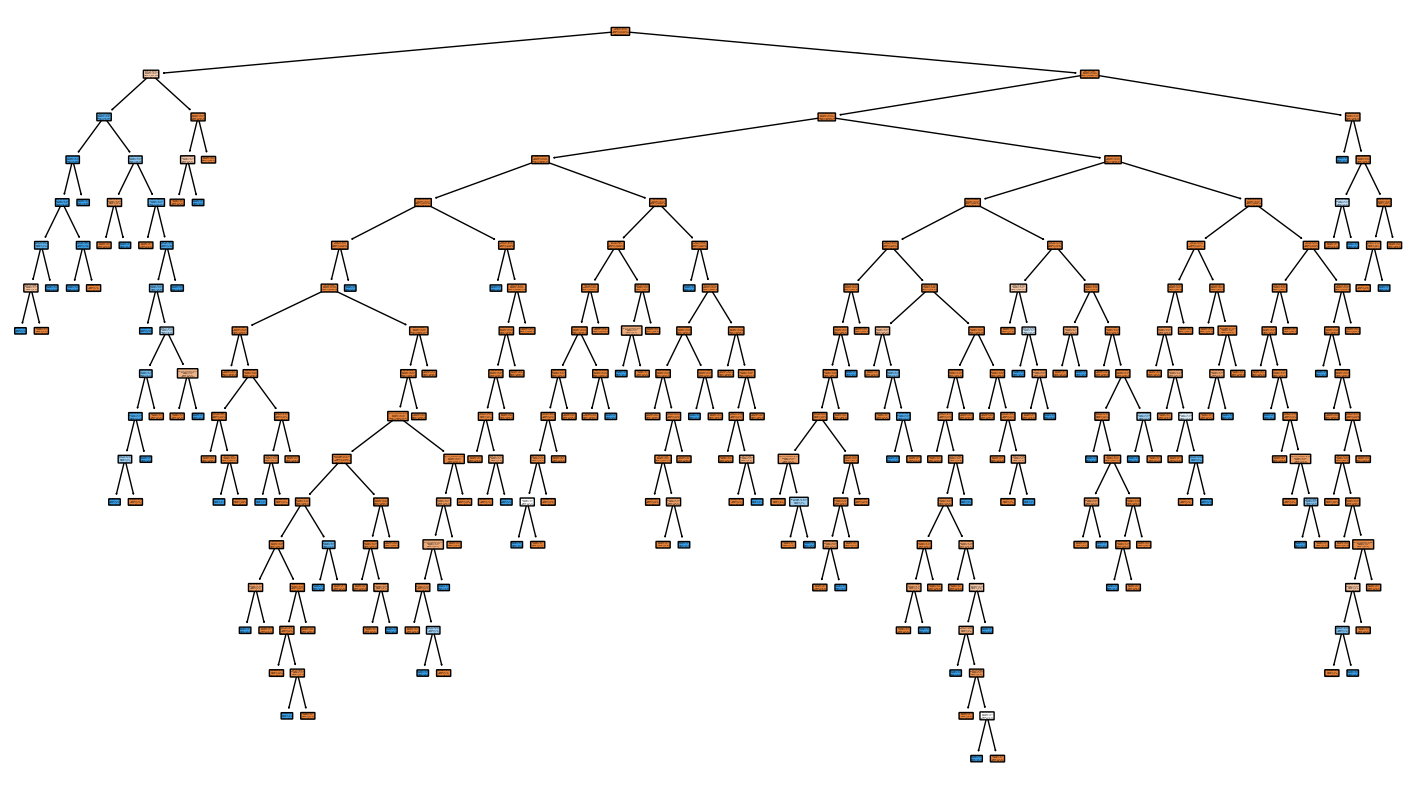

In [47]:
singletree=rfc.estimators_[0]
plt.figure(figsize=(18, 10))
plot_tree(
    singletree,
    feature_names=X.columns,
    class_names=["Not Fraud", "Fraud"],
    filled=True,
    rounded=True
)
plt.show()